In [2]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

display(train.head(), train.shape, test.head(), test.shape)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(1460, 81)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


(1459, 80)

## 1. concat사용 시 keys 옵션 활용
* **train, test 데이터를 합칠 때 key값을 부여하여 추후 재분리를 용이하게 한다.**
    * keys 옵션은 튜플로 대응시킨다
    * 본래 concat 시에는 axis = 0이 디폴트이다. 따라서 이를 설정하지 않았으니, 상하 방향으로 concat을 하게 된다.

In [6]:
data = pd.concat([train, test], keys = ('x', 'y'))
data.drop('Id', axis = 1, inplace = True)

data

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
x 0             60       RL         65.0     8450   Pave   NaN      Reg   
  1             20       RL         80.0     9600   Pave   NaN      Reg   
  2             60       RL         68.0    11250   Pave   NaN      IR1   
  3             70       RL         60.0     9550   Pave   NaN      IR1   
  4             60       RL         84.0    14260   Pave   NaN      IR1   
...            ...      ...          ...      ...    ...   ...      ...   
y 1454         160       RM         21.0     1936   Pave   NaN      Reg   
  1455         160       RM         21.0     1894   Pave   NaN      Reg   
  1456          20       RL        160.0    20000   Pave   NaN      Reg   
  1457          85       RL         62.0    10441   Pave   NaN      Reg   
  1458          60       RL         74.0     9627   Pave   NaN      Reg   

       LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
x 0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
  1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
  2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
  3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
  4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...            ...       ...       ...       ...          ...        ...   
y 1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
  1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
  1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
  1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
  1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

       Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
x 0          Norm     1Fam     2Story            7            5       2003   
  1          Norm     1Fam     1Story            6            8       1976   
  2          Norm     1Fam     2Story            7            5       2001   
  3          Norm     1Fam     2Story            7            5       1915   
  4          Norm     1Fam     2Story            8            5       2000   
...           ...      ...        ...          ...          ...        ...   
y 1454       Norm    Twnhs     2Story            4            7       1970   
  1455       Norm   TwnhsE     2Story            4            5       1970   
  1456       Norm     1Fam     1Story            5            7       1960   
  1457       Norm     1Fam     SFoyer            5            5       1992   
  1458       Norm     1Fam     2Story            7            5       1993   

        YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
x 0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
  1             1976     Gable  CompShg     MetalSd     MetalSd       None   
  2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
  3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
  4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...              ...       ...      ...         ...         ...        ...   
y 1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
  1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
  1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
  1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
  1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

        MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
x 0          196.0        Gd        TA      PConc       Gd       TA   
  1            0.0        TA        TA     CBlock       Gd       TA   
  2          162.0        Gd        TA      PConc       Gd       TA   
  3            0.0        TA        

* **이후 재분리할 때에는 .loc(key값)을 이용하여 불러온 뒤 이를 적절한 변수명에 맞춰 할당한다.**

In [10]:
data.loc['x']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,953.0,953.0,GasA,Ex,Y,SBrkr,953,694,0,1647,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2.0,460.0,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000.0
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790.0,Rec,163.0,589.0,1542.0,GasA,TA,Y,SBrkr,2073,0,0,2073,1.0,0.0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2.0,500.0,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000.0
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275.0,Unf,0.0,877.0,1152.0,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0.0,0.0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1.0,252.0,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam

In [11]:
data.loc['y']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,Hd

## 2. null data 비중 구하기

In [17]:
data.isnull().sum().sort_values(ascending = False)
# 이 결과는 각 feature별 null data의 갯수를 내림차순으로 나열한 것이다. ---- A

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
SalePrice        1459
                 ... 
1stFlrSF            0
CentralAir          0
SaleCondition       0
Heating             0
MSSubClass          0
Length: 80, dtype: int64

In [18]:
data.isnull().count()
# 이 결과는 각 feature별 data 총 갯수를 나타낸다. 모두 2919로 같다. ----- B

MSSubClass       2919
MSZoning         2919
LotFrontage      2919
LotArea          2919
Street           2919
                 ... 
MoSold           2919
YrSold           2919
SaleType         2919
SaleCondition    2919
SalePrice        2919
Length: 80, dtype: int64

In [19]:
# 결국 각 feature별 A 를 B로 나누면 null data의 비율을 구할 수 있다. 
data.isnull().sum() / data.isnull().count()

MSSubClass       0.000000
MSZoning         0.001370
LotFrontage      0.166495
LotArea          0.000000
Street           0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000343
SaleCondition    0.000000
SalePrice        0.499829
Length: 80, dtype: float64

In [20]:
# 이를 내림차순으로 하면, 결과 A 와 순서가 같아진다.(분모가 2919로 고정이므로) ---- C
(data.isnull().sum() / data.isnull().count()).sort_values(ascending = False)

PoolQC           0.996574
MiscFeature      0.964029
Alley            0.932169
Fence            0.804385
SalePrice        0.499829
                   ...   
1stFlrSF         0.000000
CentralAir       0.000000
SaleCondition    0.000000
Heating          0.000000
MSSubClass       0.000000
Length: 80, dtype: float64

In [22]:
# A 와 C를 이용하여 아래와 같이 최종적으로 null data의 비중이 높은 상위 20개 feature를 추출할 수 있다.

null_data = data.isnull().sum().sort_values(ascending = False)
null_percentage = (data.isnull().sum() / data.isnull().count()).sort_values(ascending = False)

missing_data = pd.concat([null_data, null_percentage], axis = 1, keys = ('null count', 'null ratio'))

missing_data.head(20)

,null count,null ratio
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageYrBlt,159,0.054471
GarageQual,159,0.054471


## 3. 수치형 변수와 명목형 변수의 null data 채우기

* **유용한 함수**
```python
df._get_numeric_data()
df._get_numeric_data().columns
```

In [23]:
# 위 함수를 이용하여 자동으로 int, float 데이터 타입인 feature만 추출할 수 있다.

data._get_numeric_data()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
x 0             60         65.0     8450            7            5       2003   
  1             20         80.0     9600            6            8       1976   
  2             60         68.0    11250            7            5       2001   
  3             70         60.0     9550            7            5       1915   
  4             60         84.0    14260            8            5       2000   
...            ...          ...      ...          ...          ...        ...   
y 1454         160         21.0     1936            4            7       1970   
  1455         160         21.0     1894            4            5       1970   
  1456          20        160.0    20000            5            7       1960   
  1457          85         62.0    10441            5            5       1992   
  1458          60         74.0     9627            7            5       1993   

        YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
x 0             2003       196.0       706.0         0.0      150.0   
  1             1976         0.0       978.0         0.0      284.0   
  2             2002       162.0       486.0         0.0      434.0   
  3             1970         0.0       216.0         0.0      540.0   
  4             2000       350.0       655.0         0.0      490.0   
...              ...         ...         ...         ...        ...   
y 1454          1970         0.0         0.0         0.0      546.0   
  1455          1970         0.0       252.0         0.0      294.0   
  1456          1996         0.0      1224.0         0.0        0.0   
  1457          1992         0.0       337.0         0.0      575.0   
  1458          1994        94.0       758.0         0.0      238.0   

        TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
x 0           856.0       856       854             0       1710   
  1          1262.0      1262         0             0       1262   
  2           920.0       920       866             0       1786   
  3           756.0       961       756             0       1717   
  4          1145.0      1145      1053             0       2198   
...             ...       ...       ...           ...        ...   
y 1454        546.0       546       546             0       1092   
  1455        546.0       546       546             0       1092   
  1456       1224.0      1224         0             0       1224   
  1457        912.0       970         0             0        970   
  1458        996.0       996      1004             0       2000   

        BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
x 0              1.0           0.0         2         1             3   
  1              0.0           1.0         2         0             3   
  2              1.0           0.0         2         1             3   
  3              1.0           0.0         1         0             3   
  4              1.0           0.0         2         1             4   
...              ...           ...       ...       ...           ...   
y 1454           0.0           0.0         1         1             3   
  1455           0.0           0.0         1         1             3   
  1456           1.0           0.0         1         0             4   
  1457           0.0           1.0         1         0             3   
  1458           0.0           0.0         2         1             3   

        KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
x 0                1             8           0       2003.0         2.0   
  1                1             6           1       1976.0         2.0   
  2                1             6           1       2001.0         2.0   
  3                1             7           1       1998.0         3.0   
  4                1             9           1       2000.0         3.0   
...              ...           ...         ...    

In [24]:
# 여기에서, 해당 컬럼만 추출하는 방법은 아래와 같다. ---- A
data._get_numeric_data().columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [29]:
# A를 num_data라는 변수에 할당한다. 일단 수치형 변수의 구분은 이렇게 끝났다.
num_data = data._get_numeric_data().columns

In [30]:
# 이제 명목형 변수를 모아야 한다. 쉽게 보면 전체 변수에서 위의 num_data를 제외한 것이 명목형 변수가 될 것이다.
# 단, 다음과 같이 직접적으로 뺄셈을 하면 브로드캐스팅 가능 조건에 맞지 않아 연산이 안 된다.

data.columns - num_data

ValueError: operands could not be broadcast together with shapes (80,) (37,) 

In [34]:
# 그래서 이 경우는 집합 연산을 이용하여 해결할 수 있다.(차집합의 원리)
set(data.columns) - set(num_data)

{'Alley',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'Neighborhood',
 'PavedDrive',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities'}

In [35]:
# 이를 cat_data 변수에 할당하면, 수치형 변수와 명목형 변수의 구분이 끝났다.
cat_data = set(data.columns) - set(num_data)

In [36]:
# 정확히 구분되었는지 아래와 같이 검산해보면 올바르게 잘 구분되었음을 알 수 있다.
len(cat_data) + len(num_data) == len(data.columns)

True

In [37]:
# 아래와 같이 for문을 이용하여 null data를 채운다.

for col in num_data:
    data[col].fillna(data[col].mean(), inplace = True)
    
for col in cat_data:
    data[col].fillna(data[col].mode(), inplace = True)

## 4. 명목형 변수 내의 불균형 정리
* **가령 '성적'이라는 변수 내에 "높음, 보통, 낮음" 이 있는데 전체 행의 80%가 '높음'이라면 이 변수는 큰 의미를 갖지 못한다.**

In [50]:
# 아래 PavedDrive 라는 feature를 보면, 전체 중 거의 대부분(90%)이 Y를 나타낸다.
# 이 경우는 결국 대부분의 집들이 PavedDrive라는 항목에 대해 Y를 나타내므로 의미있는 feature라고 할 수 없는 것이다.

data['PavedDrive'].value_counts(normalize = True)

Y    0.904762
N    0.073998
P    0.021240
Name: PavedDrive, dtype: float64

In [51]:
# 위 코드의 결과는, 기본적으로 내림차순으로 나타낸다. 
# 즉, 가장 높은 percentage만 기준으로 불균형 여부를 진단해도 된다는 의미이다.
# 결론적으로 이 불균형 정리에 필요한 건 아래의 값이 된다.

data['PavedDrive'].value_counts(normalize = True)[0]

0.9047619047619048

In [60]:
# 일단 cuf-off인 80%를 정의하고,
cut_off = 0.8

# 나중에 for 문을 통해 걸러질 컬럼명들이 담길 빈 리스트를 만들어 놓는다.
drop_col = []

# for와 if문을 이용하여 간단하게 아래와 같이 돌릴 수 있다.
# drop_col += [i]에서 i에 리스트를 취한 이유는, 리스트를 취하지 않으면 문자가 개별 스펠링으로 담기기 때문이다.
# 이를테면, 'PavedDrive'가 drop_col에 들어갈 때 리스트 형태로 담기지 않는다면 'P', 'a','v','e' 이런 식으로 담기게 된다.

for i in cat_data:
    if data[i].value_counts(normalize = True)[0] >= cut_off:
        drop_col += [i]
        
drop_col

['BsmtCond',
 'BsmtFinType2',
 'LandContour',
 'Electrical',
 'Condition1',
 'Utilities',
 'RoofMatl',
 'GarageQual',
 'CentralAir',
 'ExterCond',
 'Functional',
 'BldgType',
 'MiscFeature',
 'GarageCond',
 'Condition2',
 'SaleCondition',
 'Street',
 'Heating',
 'SaleType',
 'PavedDrive',
 'LandSlope']

In [61]:
data.drop(drop_col, axis = 1, inplace = True)

print(data.shape)

(2919, 59)


## 5. 상관관계 분석 

In [69]:
corr_rank = train.corr()['SalePrice'].sort_values(ascending = False)

corr_rank

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475210
GarageYrBlt      0.471062
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334820
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [72]:
cut_off = 0.1
drop_col = []

for i in corr_rank.index:
    if abs(corr_rank[i]) <= cut_off:
        drop_col += [i]
        
drop_col

['PoolArea',
 'MoSold',
 '3SsnPorch',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'MiscVal',
 'LowQualFinSF',
 'YrSold',
 'OverallCond',
 'MSSubClass']

In [74]:
data.drop(drop_col, axis = 1, inplace = True)
data.shape

(2919, 49)

### 히트맵 색다르게 표현하기

* **상관관계가 0.5 이상으로 높은 feature들만 이용하여 히트맵으로 표현**
* **히트맵은 상관관계 테이블을 색상으로 보기 쉽게 표현한 것이므로, 위의 corr_rank를 이용하면 안된다.**

In [77]:
# 아래와 같은 상관계수 행렬이 필요하다. 
# 즉, 정방행렬이면서 대각원소의 값인 1을 기준으로 좌우의 데이터의 값이 같은 행렬

corr = train.corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356828,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022905,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.079867,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.356828,1.000000,0.305194,0.234641,-0.053148,0.116955,0.083176,0.179112,0.214800,0.042720,0.123537,0.363451,0.413931,0.072418,0.037290,0.368132,0.090677,-0.006816,0.180508,0.047525,0.236901,-0.005167,0.320421,0.233967,0.064719,0.269604,0.323566,0.076000,0.137147,0.010143,0.062061,0.037665,0.180839,0.000159,0.010366,0.006494,0.334820
LotArea,-0.139781,0.305194,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103952,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024534,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234641,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410200,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.518996,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.053148,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127760,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306130,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.116955,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314704,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.781416,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.083176,0.013788,0.550684,0.073741,0.592855,1.000000,0.179151,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.618552,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022905,0.179112,0.103952,0.410200,-0.127760,0.314704,0.179151,1.000000,0.263552,-0.072289,0.114181,0.362423,0.342132,0.174018,-0.069063,0.389871,0.085026,0.026679,0.275694,0.200781,0.102424,-0.037380,0.280024,0.247897,0.249775,0.363756,0.372548,0.159361,0.124932,-0.109851,0.018800,0.061465,0.011726,-0.029811,-0.005951,-0.008186,0.475210
BsmtFinSF1,-0.069836,0.214800,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263552,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.150742,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.042720,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072289,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.086977,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [87]:
# corr에서 SalePrice와 상관관계가 높은 (절대값 0.5 이상) feature들의 컬럼명만을 담는다.
top_features = corr[abs(corr['SalePrice']) >= 0.5].index
top_features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

In [91]:
# 위의 top_features만을 이용하여 상관관계 행렬을 top_corr에 할당한다.
top_corr = train[top_features].corr()

top_corr

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
OverallQual,1.000000,0.572323,0.550684,0.537808,0.476224,0.593007,0.550600,0.427452,0.600671,0.562022,0.790982
YearBuilt,0.572323,1.000000,0.592855,0.391452,0.281986,0.199010,0.468271,0.095589,0.537850,0.478954,0.522897
YearRemodAdd,0.550684,0.592855,1.000000,0.291066,0.240379,0.287389,0.439046,0.191740,0.420622,0.371600,0.507101
TotalBsmtSF,0.537808,0.391452,0.291066,1.000000,0.819530,0.454868,0.323722,0.285573,0.434585,0.486665,0.613581
1stFlrSF,0.476224,0.281986,0.240379,0.819530,1.000000,0.566024,0.380637,0.409516,0.439317,0.489782,0.605852
GrLivArea,0.593007,0.199010,0.287389,0.454868,0.566024,1.000000,0.630012,0.825489,0.467247,0.468997,0.708624
FullBath,0.550600,0.468271,0.439046,0.323722,0.380637,0.630012,1.000000,0.554784,0.469672,0.405656,0.560664
TotRmsAbvGrd,0.427452,0.095589,0.191740,0.285573,0.409516,0.825489,0.554784,1.000000,0.362289,0.337822,0.533723
GarageCars,0.600671,0.537850,0.420622,0.434585,0.439317,0.467247,0.469672,0.362289,1.000000,0.882475,0.640409
GarageArea,0.562022,0.478954,0.371600,0.486665,0.489782,0.468997,0.405656,0.337822,0.882475,1.000000,0.623431


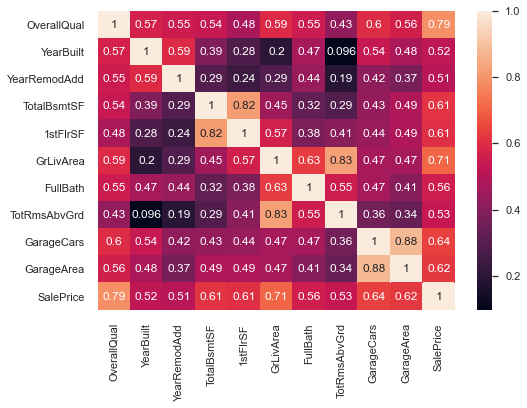

In [94]:
# 간단히 그리면 아래와 같다. 이를 좀 더 깔끔하고 큼직하게 표현해보자.
sns.heatmap(top_corr, annot = True)

plt.show()

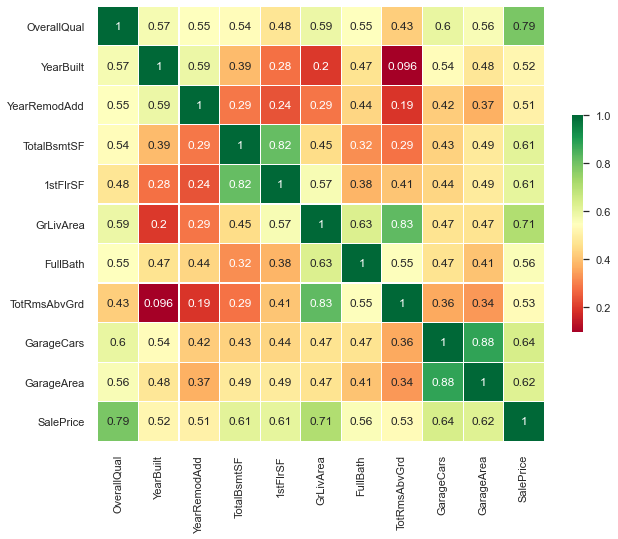

In [99]:
# 여기서 좀 더 깔끔하게.. 대각원소를 기준으로 좌우 대칭이므로 하나만 표현해보자.

plt.figure(figsize = (10, 8))

sns.heatmap(top_corr, annot= True, cmap = 'RdYlGn', linewidths = 0.1, cbar_kws={'shrink' : 0.5})

plt.show()

In [121]:
# 다음을 통해 top_corr와 동일한 행렬이 영행렬로 만들어지고, 
# dtype을 np.bool로 했는데, 영행렬이니 모두 False로 지정이 된다. 결과를 보면 이는 생략해도 무방한 것 같다.
# 히트맵에서 이 작업 관련 parameter 이름이 mask이므로, 관례적으로 mask라는 변수명을 사용한다.

mask = np.zeros_like(top_corr)
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [122]:
# 삼각형 마스크를 어느 방향에 씌울 것인지 지정
# True면 위쪽, False면 아래쪽이라는데... False를 하면 그냥 다 나옴.. 앞으로도 그냥 True만 쓰기로..

mask[np.triu_indices_from(mask)] = True

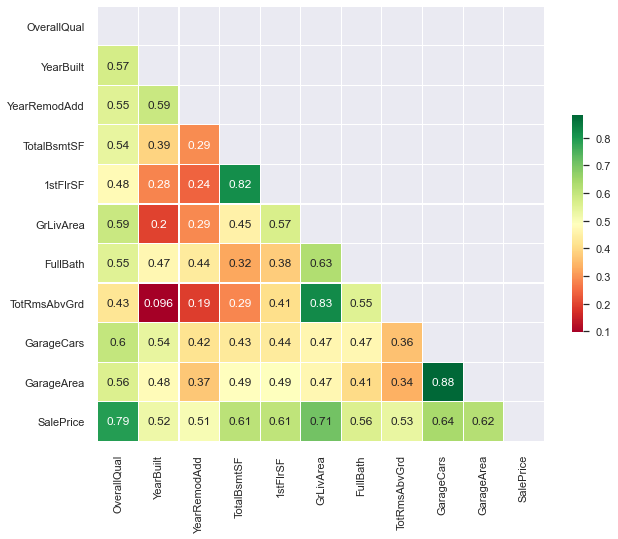

In [123]:
plt.figure(figsize = (10, 8))

sns.heatmap(top_corr, annot= True, cmap = 'RdYlGn', linewidths = 0.1, cbar_kws={'shrink' : 0.5},
           mask = mask)

plt.show()

### 상관관계 상위 12개 vs. 타겟변수 scatter plot

In [128]:
# 위에서 생성한 corr_rank에서 타겟변수를 제외
corr_rank.drop('SalePrice', inplace = True)

In [142]:
# 이미 내림차순이 되어 있으므로, 순서대로 12개를 top_12_corr 변수에 할당
top_12_corr = corr_rank[0:12]
top_12_corr = top_12_corr.index

* 일단 그래프를 그릴 행렬의 크기를 subplots로 지정하고 나면, 반복문을 통해 각 그래프가 들어갈 자리 역시 반복문의 형식으로 지정할 수 있다.

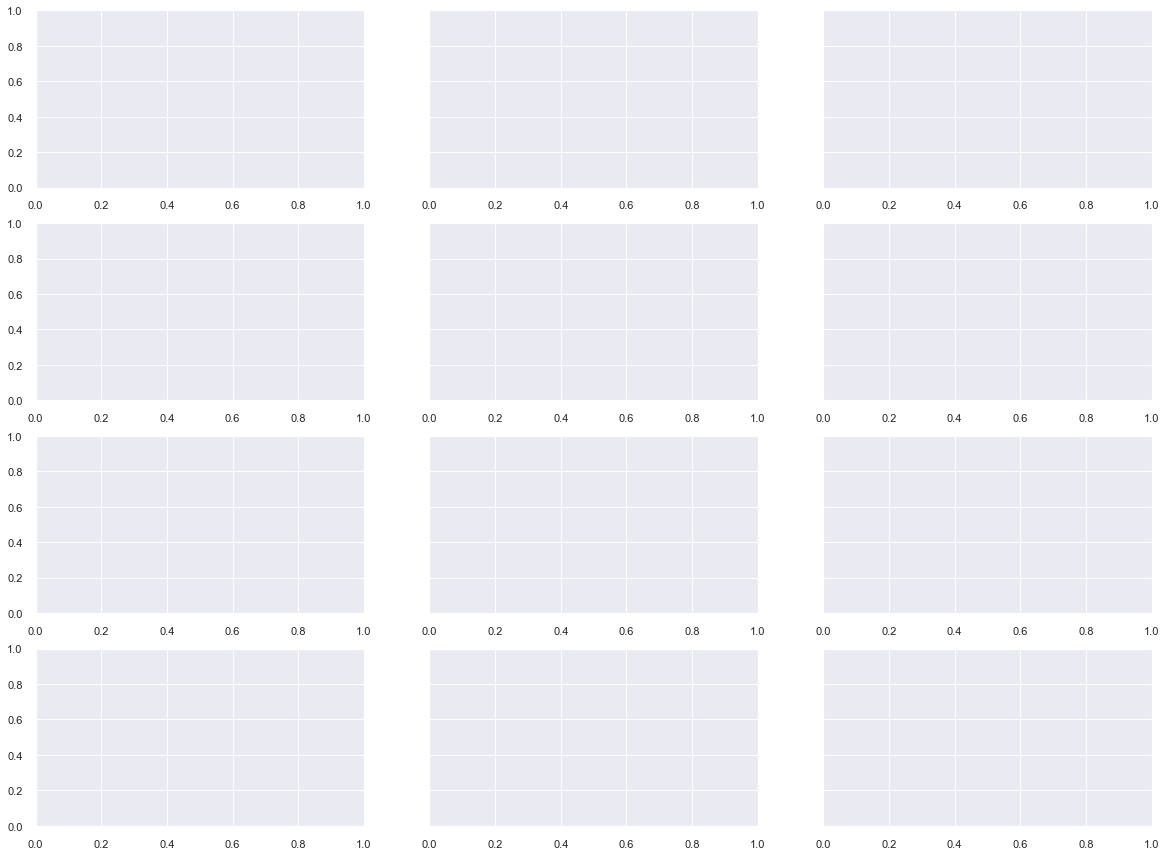

In [136]:
# 위의 12개 feature들이 각각 타겟변수인 SalePrice와 어떤 관계를 갖는지 보는 것이 목적이므로 sharey 옵션을 True로 선택한다.
fig, axes = plt.subplots(4, 3, figsize = (20, 15), sharey = True)

# 좌측 상단의 좌표는 (0, 0), 그 옆으로 (0, 1), (0, 2)이다.
# 두번째 줄은 (1, 0), (1, 1), (1, 2) 이고 나머지 줄도 이런 식으로 좌표를 갖게 된다.

* **plt.subplots는 두 개의 객체를 반환하며, 이를 각각 fig, axes에 할당하였다.**
    * fig: 전체 그래프. 이를 이용하여 전체를 제어한다.
        * 아래 코드를 보면, fig.suptitle()을 통해 전체를 표현하는 것을 볼 수 있다.
    * axes: 개별 그래프를 제어하는 메서드를 호출한다.
        * 아래 코드를 보면, axes를 통해 개별 그래프에 접근하여 제목을 나타낼 수 있다.

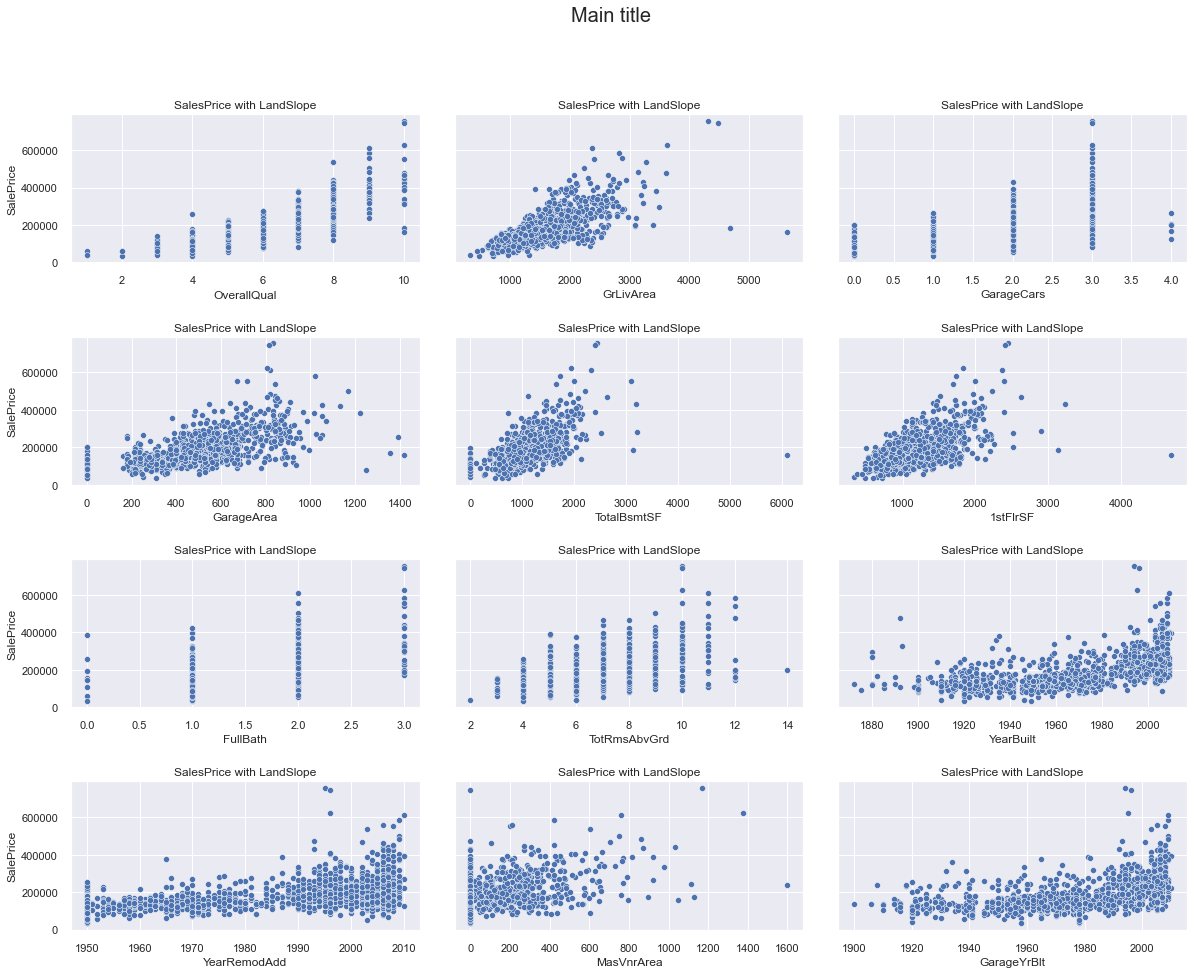

In [153]:
fig, axes = plt.subplots(4, 3, figsize = (20, 15), sharey = True)

fig.suptitle('Main title', fontsize = 20)
plt.subplots_adjust(hspace = 0.5, wspace = 0.1)

for i, j in zip(range(12), top_12_corr):
    sns.scatterplot(x = train[j], y = train['SalePrice'],
                   ax = axes[i//3][i%3])
    axes[i//3][i%3].set_title('SalesPrice with '+col)

* **zip 함수**
    * 동일한 길이를 가진 두 개의 iterable 객체를 순서대로 짝지어준다.
    * 마치 김밥을 만 뒤 균등하게 썰어내는 것으로 생각하면 된다.

In [124]:
a = [1, 2, 3, 4, 5]
b = ['a','b','c','d','e']

for x,y in zip (a,b):
    print(x,y)

1 a
2 b
3 c
4 d
5 e


In [156]:
a = range(1, 6)
b = ['a','b','c','d','e']

for x,y in zip (a,b):
    print(x,y)

1 a
2 b
3 c
4 d
5 e


## 6. 아웃라이어 처리 함수
* 위의 12개 그래프를 살펴보면 주로 넓이와 관련된 feature들이 아웃라이어가 많음을 알 수 있다.
* 따라서 Area, 또는 SF가 들어간 feature만 갖고 진행한다.
* 4분위수를 이용하여 아웃라이어 처리 함수 만들기

In [160]:
data_outliers = data[['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
                      '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

<AxesSubplot:xlabel='LotArea'>

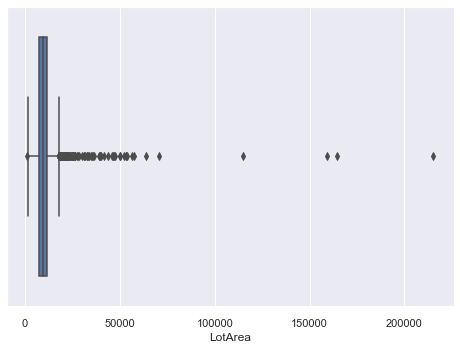

In [165]:
# LotArea를 예를 들면, 아래와 같이 (Q3 + 1.5*IQR)위에 무수히 많은 아웃라이어가 있다.
sns.boxplot(data['LotArea'])

In [204]:
# 기존 커널 대비 수정함
# 함수에 들어가는 데이터에서 아웃라이어를 제거할 컬럼만 선별하고,
# 해당 컬럼의 값이 그 컬럼 내의 lower_bound이보다 작다면 lower_bound값으로 통일하고,
# 해당 컬럼의 값이 그 컬럼 내의 upper_bound이보다 크다면 upper_bound값으로 통일하기

def modify_outliers(x):
    df_outlier = x[['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
                      '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]
    
    
    q1 = df_outlier.quantile(0.25)
    q3 = df_outlier.quantile(0.75)
    
    iqr = q3 - q1
    
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
        
    for col in df_outlier.columns:
        for i in range(0, len(df_outlier[col])):
            if df_outlier[col][i] < lower_bound[col]:
                df_outlier[col][i] = lower_bound[col]
                
            if df_outlier[col][i] > upper_bound[col]:
                df_outlier[col][i] = upper_bound[col]
                
    for col in df_outlier.columns:
        x[col] = df_outlier[col]

In [205]:
modify_outliers(data)   # 전체데이터의 아웃라이어 처리를 위해 data변수를 함수에 실행하고
modify_outliers(data_outliers)   # 아래와 같이 기존 data_outliers의 아웃라이어 처리 결과를 보기 위해 data_outliers도 실행

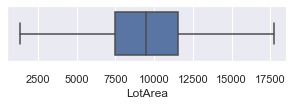

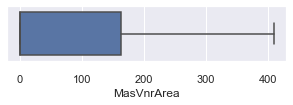

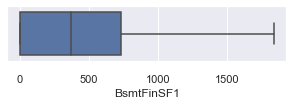

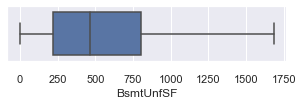

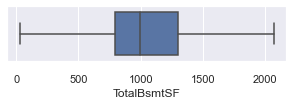

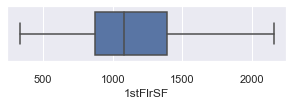

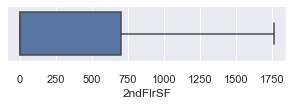

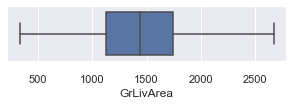

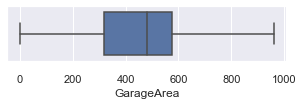

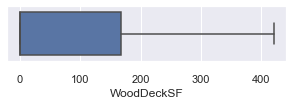

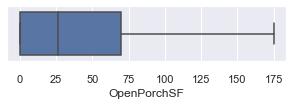

In [208]:
# 함수를 실행하니 아래와 같이 컬럼 내에 아웃라이어가 없어짐을 알 수 있다.
for i in data_outliers:
    plt.figure(figsize = (5,1))
    sns.boxplot(data_outliers[i])
    plt.show()

## 7. model별 교차검증 및 평가점수 반환 함수 

In [ ]:
# 실행 전에 train_x, y 별도 지정 필요
# cross_val_score의 scoring이 (-)로 되어 있음을 감안하여 cross앞에 (-)부호 삽입

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, train_x, y,
                                    scoring = 'neg_mean_squared_error', cv = 5))
    return(rmse)